# **ACO Alogrithm**

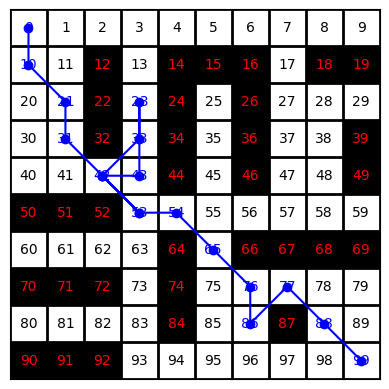

<ipython-input-36-6e0c4ed5d99c>:129: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))


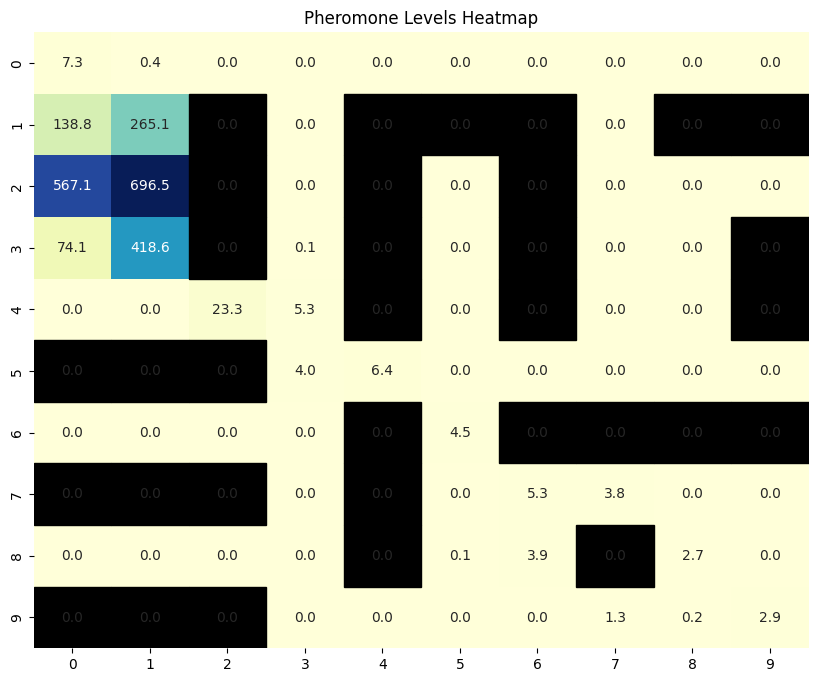

Best path: [(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (3, 3), (2, 3), (3, 3), (4, 3), (4, 2), (5, 3), (4, 2), (5, 3), (5, 4), (6, 5), (7, 6), (8, 6), (7, 7), (8, 8), (9, 9)]
Best distance: 15.778161093063913


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid size and parameters
grid_size = 10
num_ants = 10
num_iterations = 20
alpha = 1.0   # Importance of pheromone
beta = 2.0    # Importance of heuristic information
rho = 0.5     # Pheromone evaporation rate
Q = 100       # Constant for pheromone update

# Create the grid and define obstacles
grid = np.zeros((grid_size, grid_size), dtype=int)
obstacles = [12, 14, 15, 16, 18, 19, 22, 24, 26, 32, 34, 36, 39, 44, 46, 49, 50, 51, 52, 64, 66, 67, 68, 69, 70, 71, 72, 74, 84, 87, 90, 91, 92]
for obstacle in obstacles:
    row = obstacle // grid_size
    col = obstacle % grid_size
    grid[row, col] = 1

# Initialize pheromone levels
pheromone = np.ones((grid_size, grid_size))

# Define heuristic information (inverse of distance)
def heuristic(a, b):
    return 1 / (np.linalg.norm(np.array(a) - np.array(b)) + 1e-6)

# Define possible moves (8-connected grid)
moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

# Ant class to represent each ant
class Ant:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.path = [start]
        self.total_distance = 0

    def move(self, pheromone, grid):
        current = self.path[-1]
        neighbors = [(current[0] + move[0], current[1] + move[1]) for move in moves]
        neighbors = [(x, y) for x, y in neighbors if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == 0]

        if not neighbors:
            return False  # No valid moves

        probabilities = []
        for neighbor in neighbors:
            tau = pheromone[neighbor]
            eta = heuristic(neighbor, self.end)
            probabilities.append((tau ** alpha) * (eta ** beta))

        probabilities = np.array(probabilities) / np.sum(probabilities)
        next_move = neighbors[np.random.choice(len(neighbors), p=probabilities)]
        self.path.append(next_move)
        self.total_distance += heuristic(current, next_move)
        return True

    def update_pheromone(self, pheromone, Q):
        for step in self.path:
            pheromone[step] += Q / self.total_distance

# Function to run the ACO algorithm
def run_aco(start, end, num_ants, num_iterations, pheromone):
    best_path = None
    best_distance = float('inf')

    for _ in range(num_iterations):
        ants = [Ant(start, end) for _ in range(num_ants)]

        for ant in ants:
            while ant.path[-1] != end:
                if not ant.move(pheromone, grid):
                    break

        for ant in ants:
            if ant.path[-1] == end and ant.total_distance < best_distance:
                best_path = ant.path
                best_distance = ant.total_distance

        # Evaporate pheromones
        pheromone *= (1 - rho)

        # Update pheromones based on ants' paths
        for ant in ants:
            if ant.path[-1] == end:
                ant.update_pheromone(pheromone, Q)

    return best_path, best_distance

# Define the start and end points
start = (0, 0)
end = (9, 9)

# Run the ACO algorithm
best_path, best_distance = run_aco(start, end, num_ants, num_iterations, pheromone)

# Visualize the result
def plot_grid(grid, path, pheromone):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r', origin='upper')
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color='blue', marker='o')
    for i in range(grid_size):
        for j in range(grid_size):
            index = i * grid_size + j
            if (i, j) in path:
                ax.text(j, i, index, ha='center', va='center', color='blue')
            elif grid[i, j] == 1:
                ax.text(j, i, index, ha='center', va='center', color='red')
            else:
                ax.text(j, i, index, ha='center', va='center', color='black')
    ax.set_xticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

    # Set obstacles to zero in pheromone matrix for visualization
    pheromone_vis = pheromone.copy()
    pheromone_vis[grid == 1] = 0

    # Plot the heatmap for pheromone levels
    plt.figure(figsize=(10, 8))
    sns.heatmap(pheromone_vis, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
    for (i, j) in zip(*np.where(grid == 1)):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))
    plt.title('Pheromone Levels Heatmap')
    plt.show()

plot_grid(grid, best_path, pheromone)
print("Best path:", best_path)
print("Best distance:", best_distance)

# **Paper's Improved ACO Alogrithm***

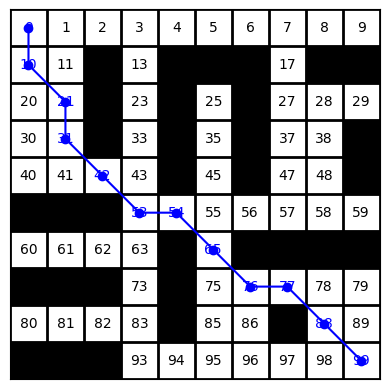

<ipython-input-10-b80eba716eef>:166: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))


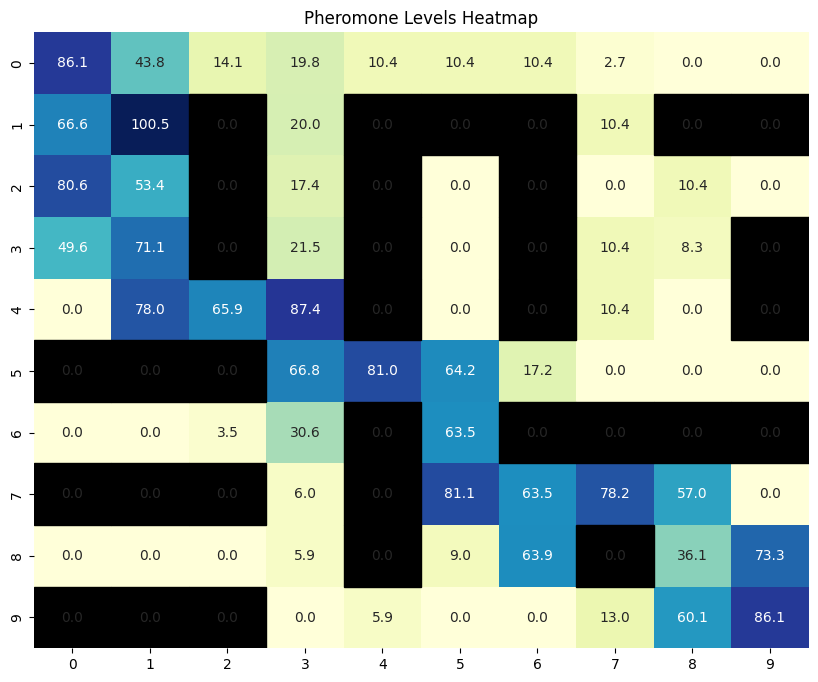

Best path: [(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (5, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9)]
Best distance: 8.949739968312308


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid size and parameters
grid_size = 10
num_ants = 10
num_iterations = 20
alpha = 1.0   # Importance of pheromone
beta = 2.0    # Importance of heuristic information
rho = 0.5     # Pheromone evaporation rate
Q = 100       # Constant for pheromone update

# Create the grid and define obstacles
grid = np.zeros((grid_size, grid_size), dtype=int)
obstacles = [12, 14, 15, 16, 18, 19, 22, 24, 26, 32, 34, 36, 39, 44, 46, 49, 50, 51, 52, 64, 66, 67, 68, 69, 70, 71, 72, 74, 84, 87, 90, 91, 92]
for obstacle in obstacles:
    row = obstacle // grid_size
    col = obstacle % grid_size
    grid[row, col] = 1

# Initialize pheromone levels
pheromone = np.ones((grid_size, grid_size))

# Define heuristic information (inverse of distance)
def heuristic(a, b):
    return 1 / (np.linalg.norm(np.array(a) - np.array(b)) + 1e-6)

# Define possible moves (8-connected grid)
moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

# Define orthogonal moves for partial pheromone update
orthogonal_moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Ant class to represent each ant
class Ant:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.path = [start]
        self.total_distance = 0
        self.visited = set()
        self.visited.add(start)

    def move(self, pheromone, grid):
        current = self.path[-1]
        neighbors = [(current[0] + move[0], current[1] + move[1]) for move in moves]
        neighbors = [(x, y) for x, y in neighbors if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == 0 and (x, y) not in self.visited]

        if not neighbors:
            return False  # No valid moves

        probabilities = []
        for neighbor in neighbors:
            tau = pheromone[neighbor]
            eta = heuristic(neighbor, self.end)
            probabilities.append((tau ** alpha) * (eta ** beta))

        probabilities = np.array(probabilities) / np.sum(probabilities)
        next_move = neighbors[np.random.choice(len(neighbors), p=probabilities)]
        self.path.append(next_move)
        self.visited.add(next_move)
        self.total_distance += heuristic(current, next_move)
        return True

    def update_pheromone(self, pheromone, Q, grid):
        for step in self.path:
            if grid[step] == 0:  # Check if not an obstacle
                pheromone[step] += Q / self.total_distance

def partial_pheromone_update(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] + move[0], step[1] + move[1]) for move in orthogonal_moves]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

def opposite_pheromone_update(pheromone, best_path, end, grid):
    for step in best_path:
        opposite = (end[0] - (step[0] - end[0]), end[1] - (step[1] - end[1]))
        neighbors = [
            opposite,
            (opposite[0] - 1, opposite[1]),  # left
            (opposite[0] + 1, opposite[1]),  # right
            (opposite[0], opposite[1] - 1),  # up
            (opposite[0], opposite[1] + 1)   # down
        ]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Function to run the improved ACO algorithm
def run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid):
    best_path = None
    best_distance = float('inf')

    for _ in range(num_iterations):
        ants = [Ant(start, end) for _ in range(num_ants)]

        for ant in ants:
            while ant.path[-1] != end:
                if not ant.move(pheromone, grid):
                    break

        for ant in ants:
            if ant.path[-1] == end and ant.total_distance < best_distance:
                best_path = ant.path
                best_distance = ant.total_distance

        # Evaporate pheromones
        pheromone *= (1 - rho)

        # Update pheromones based on ants' paths
        for ant in ants:
            if ant.path[-1] == end:
                ant.update_pheromone(pheromone, Q, grid)

        if best_path:
            partial_pheromone_update(pheromone, best_path, grid)
            opposite_pheromone_update(pheromone, best_path, end, grid)

    return best_path, best_distance

# Define the start and end points
start = (0, 0)
end = (9, 9)

# Run the improved ACO algorithm
best_path, best_distance = run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid)

# Visualize the result
def plot_grid(grid, path, pheromone):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r', origin='upper')

    # Highlight the obstacles
    for (i, j) in zip(*np.where(grid == 1)):
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='black'))

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color='blue', marker='o')

    for i in range(grid_size):
        for j in range(grid_size):
            index = i * grid_size + j
            if (i, j) in path:
                ax.text(j, i, index, ha='center', va='center', color='blue')
            elif grid[i, j] == 0:  # Only add text to non-obstacle cells
                ax.text(j, i, index, ha='center', va='center', color='black')

    ax.set_xticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

    # Set obstacles to zero in pheromone matrix for visualization
    pheromone_vis = pheromone.copy()
    pheromone_vis[grid == 1] = 0

    # Plot the heatmap for pheromone levels
    plt.figure(figsize=(10, 8))
    sns.heatmap(pheromone_vis, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
    for (i, j) in zip(*np.where(grid == 1)):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))
    plt.title('Pheromone Levels Heatmap')
    plt.show()

plot_grid(grid, best_path, pheromone)
print("Best path:", best_path)
print("Best distance:", best_distance)

# **مقایسه دو الگوریتم با هم**

Conventional ACO:
Best path: [(0, 0), (1, 1), (2, 0), (3, 1), (4, 2), (5, 3), (5, 4), (6, 5), (7, 6), (8, 6), (9, 6), (9, 7), (9, 8), (9, 9)]
Best distance: 10.94973796831431
Iterations: 20

Improved ACO:
Best path: [(0, 0), (1, 1), (2, 0), (3, 1), (4, 2), (5, 3), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9)]
Best distance: 9.07106081187101
Iterations: 20


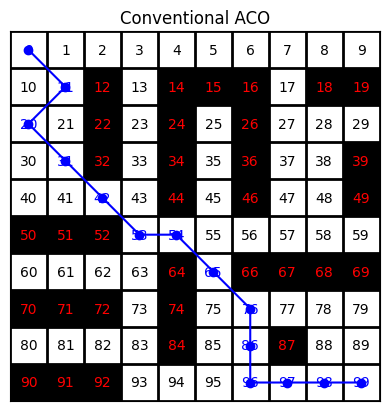

<ipython-input-16-4b676898ff21>:241: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))


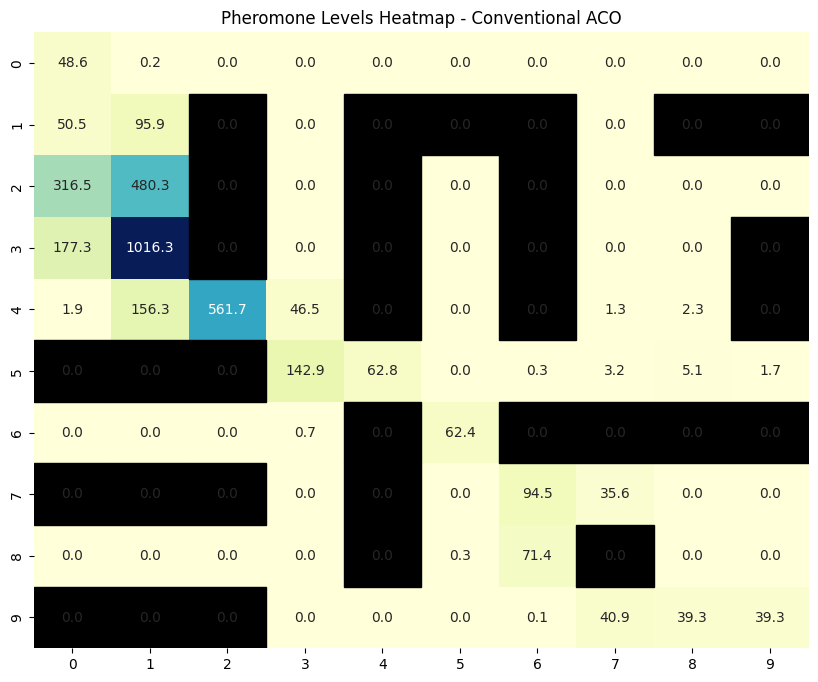

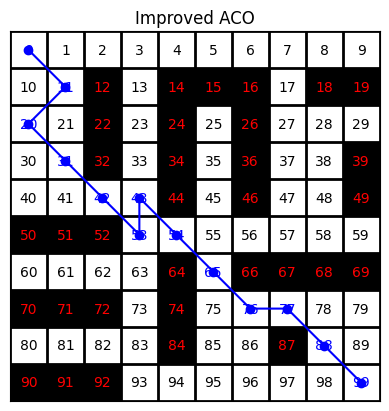

<ipython-input-16-4b676898ff21>:241: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))


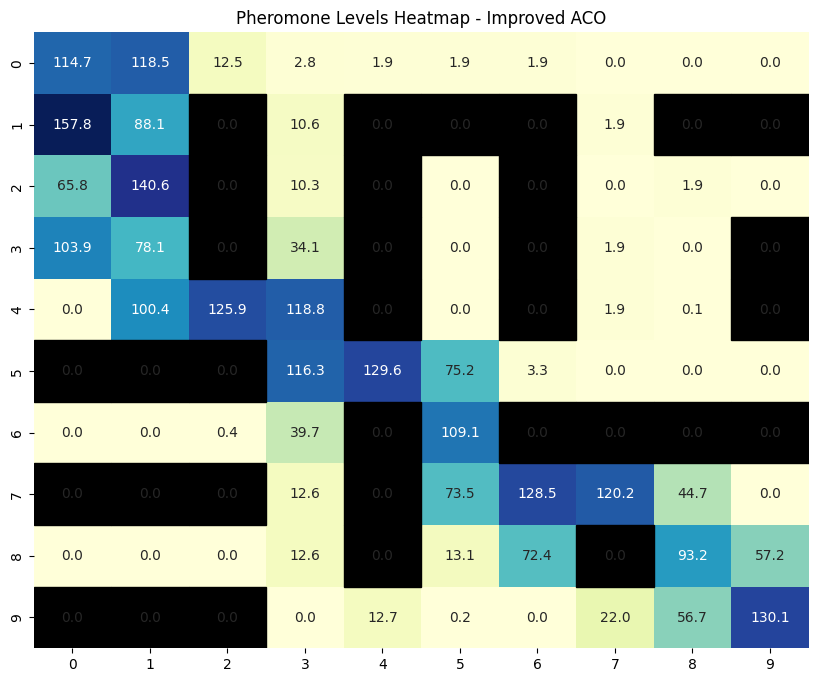

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid size and parameters
grid_size = 10
num_ants = 15
num_iterations = 20
alpha = 1.0   # Importance of pheromone
beta = 2.0    # Importance of heuristic information
rho = 0.5     # Pheromone evaporation rate
Q = 100       # Constant for pheromone update

# Create the grid and define obstacles
grid = np.zeros((grid_size, grid_size), dtype=int)
obstacles = [12, 14, 15, 16, 18, 19, 22, 24, 26, 32, 34, 36, 39, 44, 46, 49, 50, 51, 52, 64, 66, 67, 68, 69, 70, 71, 72, 74, 84, 87, 90, 91, 92]
for obstacle in obstacles:
    row = obstacle // grid_size
    col = obstacle % grid_size
    grid[row, col] = 1

# Initialize pheromone levels
initial_pheromone = np.ones((grid_size, grid_size))

# Define heuristic information (inverse of distance)
def heuristic(a, b):
    return 1 / (np.linalg.norm(np.array(a) - np.array(b)) + 1e-6)

# Define possible moves (8-connected grid)
moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

# Define orthogonal moves for partial pheromone update
orthogonal_moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Ant class to represent each ant
class Ant:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.path = [start]
        self.total_distance = 0

    def move(self, pheromone, grid):
        current = self.path[-1]
        neighbors = [(current[0] + move[0], current[1] + move[1]) for move in moves]
        neighbors = [(x, y) for x, y in neighbors if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == 0]

        if not neighbors:
            return False  # No valid moves

        probabilities = []
        for neighbor in neighbors:
            tau = pheromone[neighbor]
            eta = heuristic(neighbor, self.end)
            probabilities.append((tau ** alpha) * (eta ** beta))

        probabilities = np.array(probabilities) / np.sum(probabilities)
        next_move = neighbors[np.random.choice(len(neighbors), p=probabilities)]
        self.path.append(next_move)
        self.total_distance += heuristic(current, next_move)
        return True

    def update_pheromone(self, pheromone, Q):
        for step in self.path:
            pheromone[step] += Q / self.total_distance

# Modified Ant class for improved algorithm
class ImprovedAnt(Ant):
    def __init__(self, start, end):
        super().__init__(start, end)
        self.visited = set()
        self.visited.add(start)

    def move(self, pheromone, grid):
        current = self.path[-1]
        neighbors = [(current[0] + move[0], current[1] + move[1]) for move in moves]
        neighbors = [(x, y) for x, y in neighbors if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == 0 and (x, y) not in self.visited]

        if not neighbors:
            return False  # No valid moves

        probabilities = []
        for neighbor in neighbors:
            tau = pheromone[neighbor]
            eta = heuristic(neighbor, self.end)
            probabilities.append((tau ** alpha) * (eta ** beta))

        probabilities = np.array(probabilities) / np.sum(probabilities)
        next_move = neighbors[np.random.choice(len(neighbors), p=probabilities)]
        self.path.append(next_move)
        self.visited.add(next_move)
        self.total_distance += heuristic(current, next_move)
        return True

    def update_pheromone(self, pheromone, Q, grid):
        for step in self.path:
            if grid[step] == 0:
                pheromone[step] += Q / self.total_distance

def partial_pheromone_update(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] + move[0], step[1] + move[1]) for move in orthogonal_moves]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

def opposite_pheromone_update(pheromone, best_path, end, grid):
    for step in best_path:
        opposite = (end[0] - (step[0] - end[0]), end[1] - (step[1] - end[1]))
        neighbors = [
            opposite,
            (opposite[0] - 1, opposite[1]),  # left
            (opposite[0] + 1, opposite[1]),  # right
            (opposite[0], opposite[1] - 1),  # up
            (opposite[0], opposite[1] + 1)   # down
        ]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Function to run the ACO algorithm
def run_aco(start, end, num_ants, num_iterations, pheromone):
    best_path = None
    best_distance = float('inf')
    iterations = 0

    for i in range(num_iterations):
        ants = [Ant(start, end) for _ in range(num_ants)]

        for ant in ants:
            while ant.path[-1] != end:
                if not ant.move(pheromone, grid):
                    break

        for ant in ants:
            if ant.path[-1] == end and ant.total_distance < best_distance:
                best_path = ant.path
                best_distance = ant.total_distance

        # Evaporate pheromones
        pheromone *= (1 - rho)

        # Update pheromones based on ants' paths
        for ant in ants:
            if ant.path[-1] == end:
                ant.update_pheromone(pheromone, Q)

        iterations += 1

    return best_path, best_distance, iterations

# Function to run the improved ACO algorithm
def run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid):
    best_path = None
    best_distance = float('inf')
    iterations = 0

    for i in range(num_iterations):
        ants = [ImprovedAnt(start, end) for _ in range(num_ants)]

        for ant in ants:
            while ant.path[-1] != end:
                if not ant.move(pheromone, grid):
                    break

        for ant in ants:
            if ant.path[-1] == end and ant.total_distance < best_distance:
                best_path = ant.path
                best_distance = ant.total_distance

        # Evaporate pheromones
        pheromone *= (1 - rho)

        # Update pheromones based on ants' paths
        for ant in ants:
            if ant.path[-1] == end:
                ant.update_pheromone(pheromone, Q, grid)

        if best_path:
            partial_pheromone_update(pheromone, best_path, grid)
            opposite_pheromone_update(pheromone, best_path, end, grid)

        iterations += 1

    return best_path, best_distance, iterations

# Define the start and end points
start = (0, 0)
end = (9, 9)

# Run the ACO algorithm with identical initial values
pheromone_aco = initial_pheromone.copy()
best_path_aco, best_distance_aco, iterations_aco = run_aco(start, end, num_ants, num_iterations, pheromone_aco)

# Run the improved ACO algorithm with identical initial values
pheromone_improved_aco = initial_pheromone.copy()
best_path_improved_aco, best_distance_improved_aco, iterations_improved_aco = run_improved_aco(start, end, num_ants, num_iterations, pheromone_improved_aco, grid)

# Compare the results
print("Conventional ACO:")
print(f"Best path: {best_path_aco}")
print(f"Best distance: {best_distance_aco}")
print(f"Iterations: {iterations_aco}")

print("\nImproved ACO:")
print(f"Best path: {best_path_improved_aco}")
print(f"Best distance: {best_distance_improved_aco}")
print(f"Iterations: {iterations_improved_aco}")

# Visualize the result
def plot_grid(grid, path, pheromone, title):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r', origin='upper')
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color='blue', marker='o')
    for i in range(grid_size):
        for j in range(grid_size):
            index = i * grid_size + j
            if (i, j) in path:
                ax.text(j, i, index, ha='center', va='center', color='blue')
            elif grid[i, j] == 1:
                ax.text(j, i, index, ha='center', va='center', color='red')
            else:
                ax.text(j, i, index, ha='center', va='center', color='black')
    ax.set_xticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title(title)
    plt.show()

    # Set obstacles to zero in pheromone matrix for visualization
    pheromone_vis = pheromone.copy()
    pheromone_vis[grid == 1] = 0

    # Plot the heatmap for pheromone levels
    plt.figure(figsize=(10, 8))
    sns.heatmap(pheromone_vis, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
    for (i, j) in zip(*np.where(grid == 1)):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black', edgecolor='black'))
    plt.title(f'Pheromone Levels Heatmap - {title}')
    plt.show()

plot_grid(grid, best_path_aco, pheromone_aco, "Conventional ACO")
plot_grid(grid, best_path_improved_aco, pheromone_improved_aco, "Improved ACO")

# **بررسی تأثیر تغییر تعداد همسایگانی که تغییر میکنند. (امتیازی)**

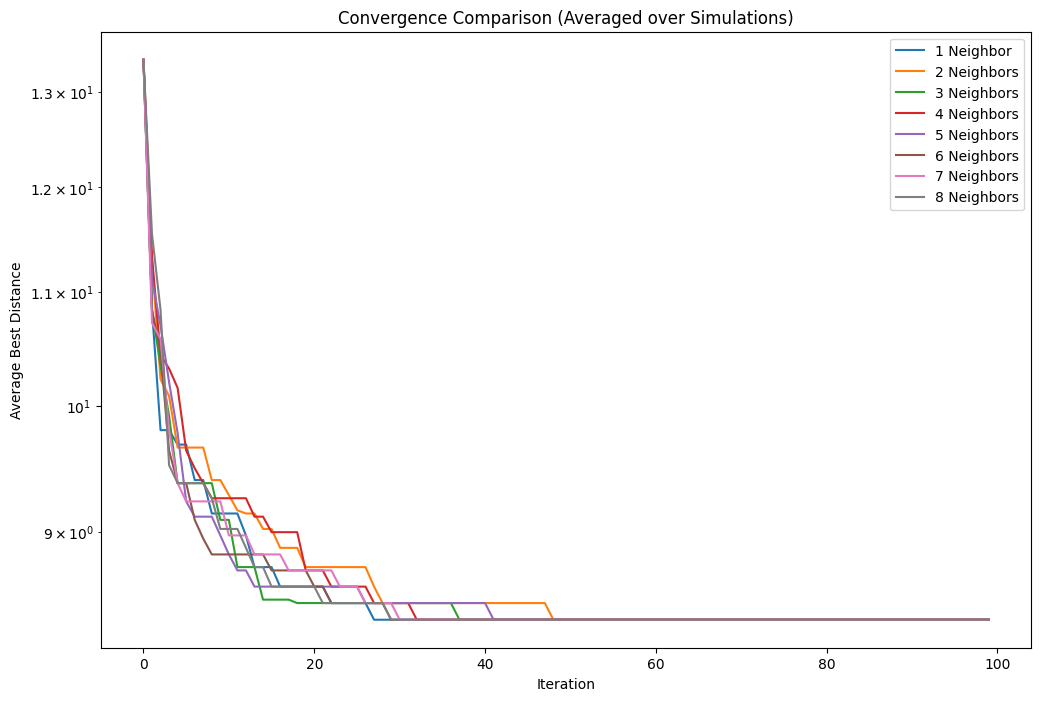

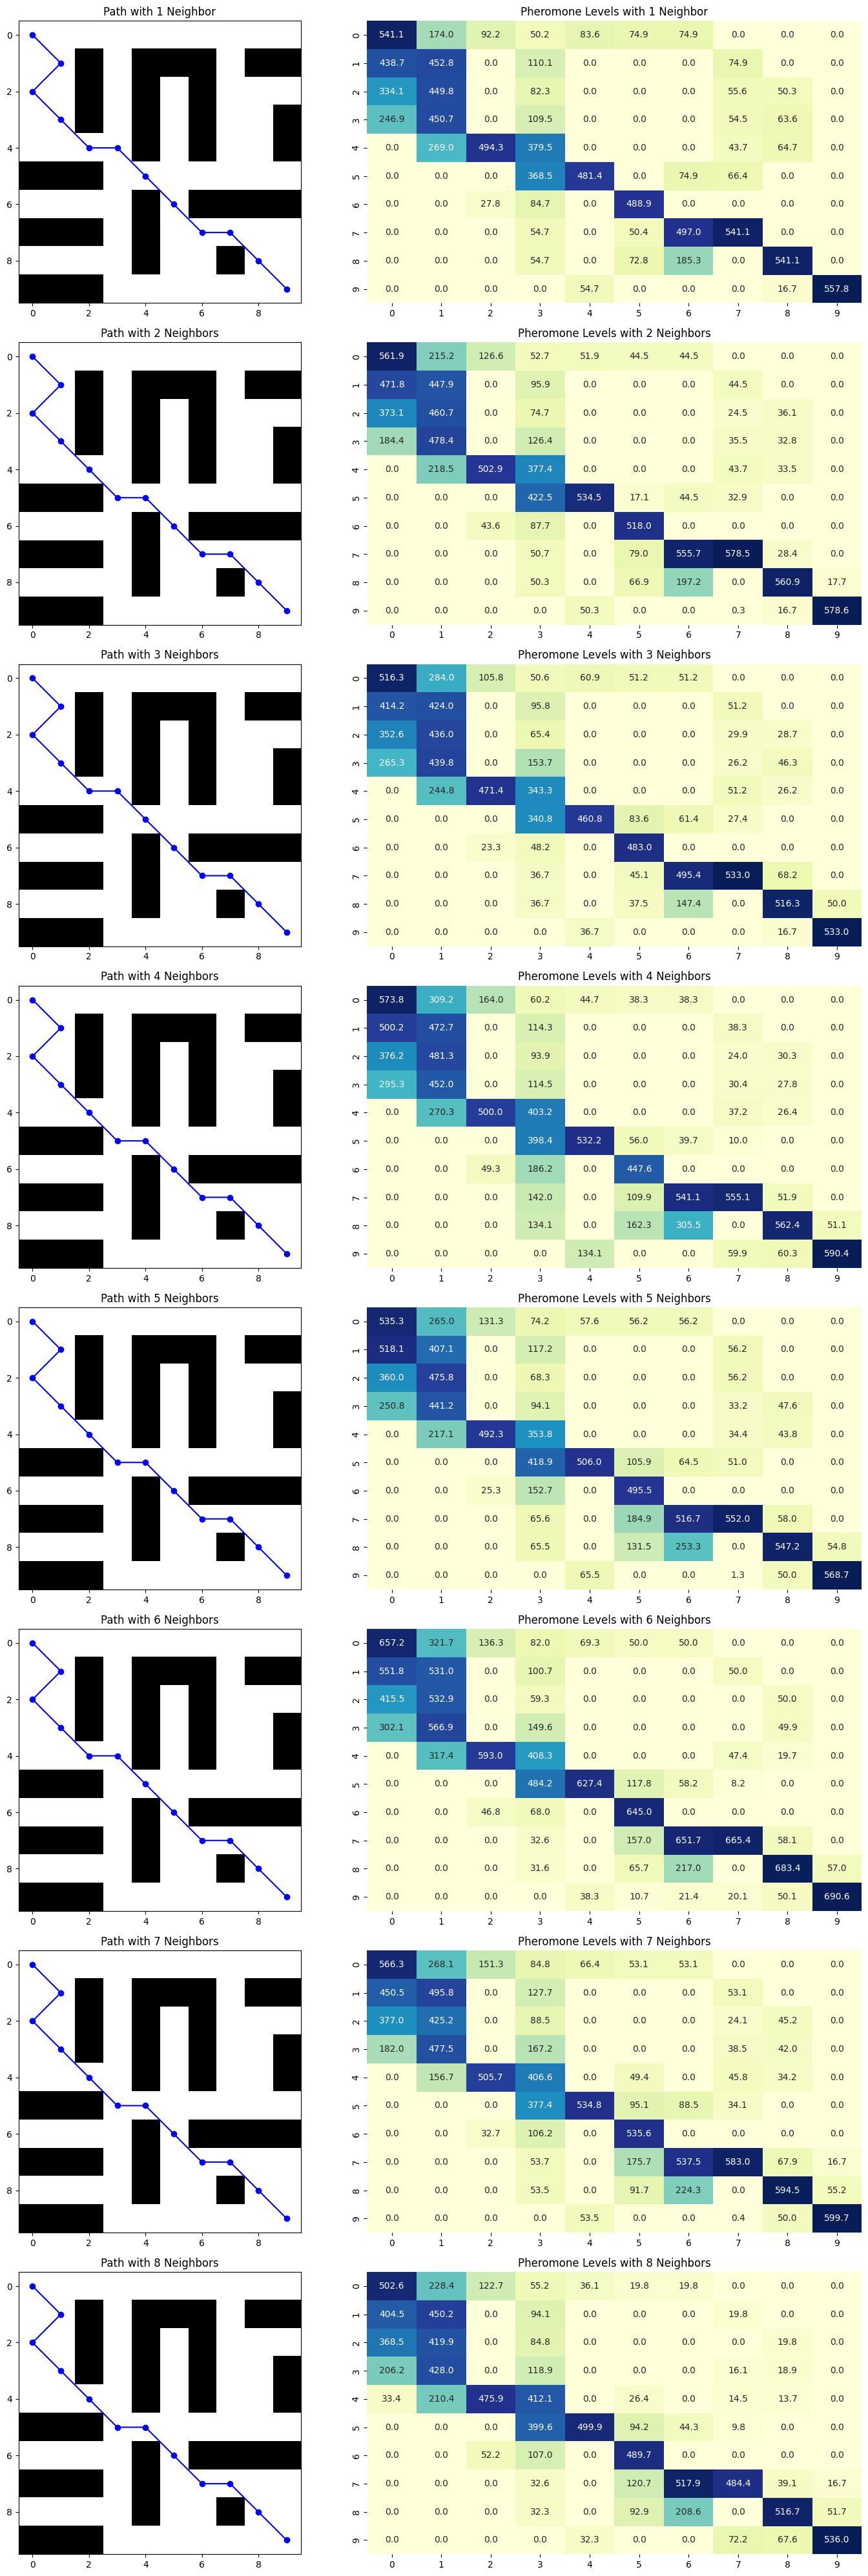

Best distance with 1 Neighbor: 8.36395453068411
Best distance with 2 Neighbors: 8.36395453068411
Best distance with 3 Neighbors: 8.36395453068411
Best distance with 4 Neighbors: 8.36395453068411
Best distance with 5 Neighbors: 8.36395453068411
Best distance with 6 Neighbors: 8.36395453068411
Best distance with 7 Neighbors: 8.36395453068411
Best distance with 8 Neighbors: 8.36395453068411


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid size and parameters
grid_size = 10
num_ants = 60
num_iterations = 100
num_simulations = 5  # Number of simulations to run
alpha = 1.0   # Importance of pheromone
beta = 2.0    # Importance of heuristic information
rho = 0.5     # Pheromone evaporation rate
Q = 100       # Constant for pheromone update

# Create the grid and define obstacles
grid = np.zeros((grid_size, grid_size), dtype=int)
obstacles = [12, 14, 15, 16, 18, 19, 22, 24, 26, 32, 34, 36, 39, 44, 46, 49, 50, 51, 52, 64, 66, 67, 68, 69, 70, 71, 72, 74, 84, 87, 90, 91, 92]
for obstacle in obstacles:
    row = obstacle // grid_size
    col = obstacle % grid_size
    grid[row, col] = 1

# Define heuristic information (inverse of distance)
def heuristic(a, b):
    return 1 / (np.linalg.norm(np.array(a) - np.array(b)) + 1e-6)

# Define possible moves (8-connected grid)
moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

# Ant class to represent each ant
class Ant:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.path = [start]
        self.total_distance = 0
        self.visited = set()
        self.visited.add(start)

    def move(self, pheromone, grid):
        current = self.path[-1]
        neighbors = [(current[0] + move[0], current[1] + move[1]) for move in moves]
        neighbors = [(x, y) for x, y in neighbors if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == 0 and (x, y) not in self.visited]

        if not neighbors:
            return False  # No valid moves

        probabilities = []
        for neighbor in neighbors:
            tau = pheromone[neighbor]
            eta = heuristic(neighbor, self.end)
            probabilities.append((tau ** alpha) * (eta ** beta))

        probabilities = np.array(probabilities) / np.sum(probabilities)
        next_move = neighbors[np.random.choice(len(neighbors), p=probabilities)]
        self.path.append(next_move)
        self.visited.add(next_move)
        self.total_distance += heuristic(current, next_move)
        return True

    def update_pheromone(self, pheromone, Q, grid):
        for step in self.path:
            if grid[step] == 0:  # Check if not an obstacle
                pheromone[step] += Q / self.total_distance


# Partial pheromone update for 1 neighbor
def partial_pheromone_update_1(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] + 1, step[1])]  # Right
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 2 neighbors
def partial_pheromone_update_2(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] + 1, step[1]), (step[0], step[1] + 1)]  # Right, Down
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 3 neighbors
def partial_pheromone_update_3(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] - 1, step[1]), (step[0] + 1, step[1]), (step[0], step[1] + 1)]  # Top, Bottom, Right
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 4 neighbors
def partial_pheromone_update_4(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] - 1, step[1]), (step[0] + 1, step[1]), (step[0], step[1] - 1), (step[0], step[1] + 1)]  # Top, Bottom, Left, Right
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 5 neighbors
def partial_pheromone_update_5(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] - 1, step[1]), (step[0] + 1, step[1]), (step[0], step[1] - 1), (step[0], step[1] + 1), (step[0] + 1, step[1] + 1)]  # Top, Bottom, Left, Right, Bottom-Right Diagonal
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 6 neighbors
def partial_pheromone_update_6(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] - 1, step[1]), (step[0] + 1, step[1]), (step[0], step[1] - 1), (step[0], step[1] + 1), (step[0] + 1, step[1] + 1), (step[0] - 1, step[1] - 1)]  # Top, Bottom, Left, Right, Bottom-Right Diagonal, Top-Left Diagonal
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 7 neighbors
def partial_pheromone_update_7(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] - 1, step[1]), (step[0] + 1, step[1]), (step[0], step[1] - 1), (step[0], step[1] + 1), (step[0] + 1, step[1] + 1), (step[0] - 1, step[1] - 1), (step[0] - 1, step[1] + 1)]  # Top, Bottom, Left, Right, Bottom-Right Diagonal, Top-Left Diagonal, Top-Right Diagonal
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Partial pheromone update for 8 neighbors
def partial_pheromone_update_8(pheromone, best_path, grid):
    for step in best_path:
        neighbors = [(step[0] + move[0], step[1] + move[1]) for move in moves]  # All 8-connected neighbors
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)


def opposite_pheromone_update(pheromone, best_path, end, grid, num_neighbors):
    directions = {
        1: [(1, 0)],  # Right
        2: [(1, 0), (0, 1)],  # Right, Down
        3: [(-1, 0), (1, 0), (0, 1)],  # Top, Bottom, Right
        4: [(-1, 0), (1, 0), (0, -1), (0, 1)],  # Top, Bottom, Left, Right
        5: [(-1, 0), (1, 0), (0, -1), (0, 1), (1, 1)],  # Top, Bottom, Left, Right, Bottom-Right Diagonal
        6: [(-1, 0), (1, 0), (0, -1), (0, 1), (1, 1), (-1, -1)],  # Top, Bottom, Left, Right, Bottom-Right Diagonal, Top-Left Diagonal
        7: [(-1, 0), (1, 0), (0, -1), (0, 1), (1, 1), (-1, -1), (-1, 1)],  # Top, Bottom, Left, Right, Bottom-Right Diagonal, Top-Left Diagonal, Top-Right Diagonal
        8: moves  # All 8-connected neighbors
    }

    for step in best_path:
        opposite = (end[0] - (step[0] - end[0]), end[1] - (step[1] - end[1]))
        neighbors = [(opposite[0], opposite[1])] + [(opposite[0] + move[0], opposite[1] + move[1]) for move in directions[num_neighbors]]
        for neighbor in neighbors:
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and grid[neighbor] == 0:
                pheromone[neighbor] += Q / len(best_path)

# Function to run the improved ACO algorithm
def run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid, partial_update, num_neighbors):
    best_path = None
    best_distance = float('inf')
    distances = []

    for _ in range(num_iterations):
        ants = [Ant(start, end) for _ in range(num_ants)]

        for ant in ants:
            while ant.path[-1] != end:
                if not ant.move(pheromone, grid):
                    break

        for ant in ants:
            if ant.path[-1] == end and ant.total_distance < best_distance:
                best_path = ant.path
                best_distance = ant.total_distance

        # Evaporate pheromones
        pheromone *= (1 - rho)

        # Update pheromones based on ants' paths
        for ant in ants:
            if ant.path[-1] == end:
                ant.update_pheromone(pheromone, Q, grid)

        if best_path:
            partial_update(pheromone, best_path, grid)
            opposite_pheromone_update(pheromone, best_path, end, grid, num_neighbors)

        distances.append(best_distance)

    return best_path, best_distance, distances

# Function to run and plot comparisons
def run_and_plot_comparison(start, end, num_ants, num_iterations, num_simulations, grid):
    # List of partial pheromone update functions and corresponding neighbor counts
    partial_updates = [
        ("1 Neighbor", partial_pheromone_update_1, 1),
        ("2 Neighbors", partial_pheromone_update_2, 2),
        ("3 Neighbors", partial_pheromone_update_3, 3),
        ("4 Neighbors", partial_pheromone_update_4, 4),
        ("5 Neighbors", partial_pheromone_update_5, 5),
        ("6 Neighbors", partial_pheromone_update_6, 6),
        ("7 Neighbors", partial_pheromone_update_7, 7),
        ("8 Neighbors", partial_pheromone_update_8, 8)
    ]

    best_distances = []
    all_distances = []

    for label, partial_update, num_neighbors in partial_updates:
        simulation_distances = np.zeros(num_iterations)

        for sim in range(num_simulations):
            np.random.seed(sim)  # Seed the random number generator for each simulation
            pheromone = np.ones((grid_size, grid_size))
            best_path, best_distance, distances = run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid, partial_update, num_neighbors)
            simulation_distances += np.array(distances)

        simulation_distances /= num_simulations  # Average over simulations
        best_distances.append(best_distance)
        all_distances.append((label, simulation_distances.tolist()))

    # Plot convergence of each method
    plt.figure(figsize=(12, 8))
    for label, distances in all_distances:
        plt.plot(distances, label=label)
    plt.xlabel('Iteration')
    plt.ylabel('Average Best Distance')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Convergence Comparison (Averaged over Simulations)')
    plt.legend()
    plt.show()

    # Plot final results for each method
    fig, axes = plt.subplots(len(partial_updates), 2, figsize=(15, 5 * len(partial_updates)))
    axes = axes.flatten()

    for idx, (label, partial_update, num_neighbors) in enumerate(partial_updates):
        pheromone = np.ones((grid_size, grid_size))
        best_path, best_distance, _ = run_improved_aco(start, end, num_ants, num_iterations, pheromone, grid, partial_update, num_neighbors)

        # Plot grid with path
        ax_grid = axes[idx * 2]
        ax_grid.imshow(grid, cmap='gray_r', origin='upper')
        if best_path:
            path_x, path_y = zip(*best_path)
            ax_grid.plot(path_y, path_x, color='blue', marker='o')
        ax_grid.set_title(f"Path with {label}")

        # Plot pheromone levels
        pheromone_vis = pheromone.copy()
        pheromone_vis[grid == 1] = 0
        ax_pheromone = axes[idx * 2 + 1]
        sns.heatmap(pheromone_vis, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False, ax=ax_pheromone)
        ax_pheromone.set_title(f"Pheromone Levels with {label}")

    plt.tight_layout()
    plt.show()

    # Print best distances for each method
    for (label, _, _), best_distance in zip(partial_updates, best_distances):
        print(f"Best distance with {label}: {best_distance}")

# Define the start and end points
start = (0, 0)
end = (9, 9)

# Run and plot comparisons
run_and_plot_comparison(start, end, num_ants, num_iterations, num_simulations, grid)